In [15]:
import ROOT
import glob
import math
import numpy as np
from IPython.display import display, Markdown
from IPython.display import display, HTML
from TPCQCVis.src.drawHistograms import *
from TPCQCVis.src.drawTrending import *
from TPCQCVis.src.checkHistograms import *

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>table {float:left;}</style>"))

In [3]:
# Read the Root Files
path = "/home/berki/alice/data/asyncQC/LHC22m/apass1/"
fileList = glob.glob(path+"*_QC.root")
fileList.sort()
runList = [fileList[i][52:-8] for i in range(len(fileList))]
rootDataFile=[]
for file in fileList:
    rootDataFile.append(ROOT.TFile.Open(file,"READ"))
#rootDataFile[0].ls()
#rootDataFile[0].ClusterQC.ls()
#rootDataFile[0].PIDQC.ls()
#rootDataFile[0].TracksQC.ls()
#runList

# Reporting on TPC QC for LHC22m
> 13.6 TeV pp <br />
> Link to JIRA: https://alice.its.cern.ch/jira/browse/O2-3135 <br />
> B = +0.5 T <br />
> beam = pp <br />
> energy (sqrt) = 13.6 TeV <br />
> Runs after the TPC firmware upgrade on Aug. 10th

## General comments
+ number of clusters vs eta distribution is not symmetrical
 + Weird shape on C side for low eta
+ Problems in A-side sectors on two runs

---
## Number of recorded tracks per run
+ Looking at hPt histogram from tracks task
+ With cuts (nClusters > 60, |eta| < 1, dEdxTot > 20)

In [4]:
%jsroot on
objectName="hPt;1"
[trend,canvas] = drawTrending(objectName,rootDataFile,names=runList,trend="entries",error="",log="logy",namesFromRunList=True)
canvas.Draw()

---
## Tracks QC
**Notes:** Runs `OK`

## Phi distribution of tracks:

+ General:
 + Sector boundaries much more prominent compared to earlier runs.
 
+ RUN 523142:
 + Promblem in Sector A7
+ RUN 523148:
 + Problem in Sectors A0 & A1

In [5]:
%jsroot on
objectName="hPhiAside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,pads=False, drawOption="SAME L")

#Sector boundatries
pad1.cd()
sectorBoundary = ROOT.TLine(0,hist.GetMinimum(),0,hist.GetMaximum())
sectorBoundary.SetLineStyle(2)
sectorNum = ROOT.TText(.5,.5,"test")
sectorNum.SetTextAlign(22)
sectorNum.SetTextColor(ROOT.kGray+1)
sectorNum.SetTextFont(0)
for j in range(19):
    sectorBoundary.DrawLine((j*2*math.pi)/18,hist.GetMinimum(),(j*2*math.pi)/18,hist.GetMaximum())
    if j < 18 : sectorNum.DrawText(((j+0.5)*2*math.pi)/18,hist.GetMaximum(),str(j))
    
canvas.Draw()

+ C-side no major issues observed

In [6]:
%jsroot on
objectName="hPhiCside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,pads=False, drawOption="SAME L")
#Sector boundatries
pad1.cd()
sectorBoundary = ROOT.TLine(0,hist.GetMinimum(),0,hist.GetMaximum())
sectorBoundary.SetLineStyle(2)
sectorNum = ROOT.TText(.5,.5,"test")
sectorNum.SetTextAlign(22)
sectorNum.SetTextColor(ROOT.kGray+1)
sectorNum.SetTextFont(0)
for j in range(19):
    sectorBoundary.DrawLine((j*2*math.pi)/18,hist.GetMinimum(),(j*2*math.pi)/18,hist.GetMaximum())
    if j < 18 : sectorNum.DrawText(((j+0.5)*2*math.pi)/18,hist.GetMaximum(),str(j))
        
canvas.Draw()

### Number of clusters vs phi

+ Unexpected high number number of cluster tracks in Run `523182`
  + Especially prominent on A side at phi ~3.8 (Boundary between sectors 10 & 11)
  + Result: `Further investigation needed`  

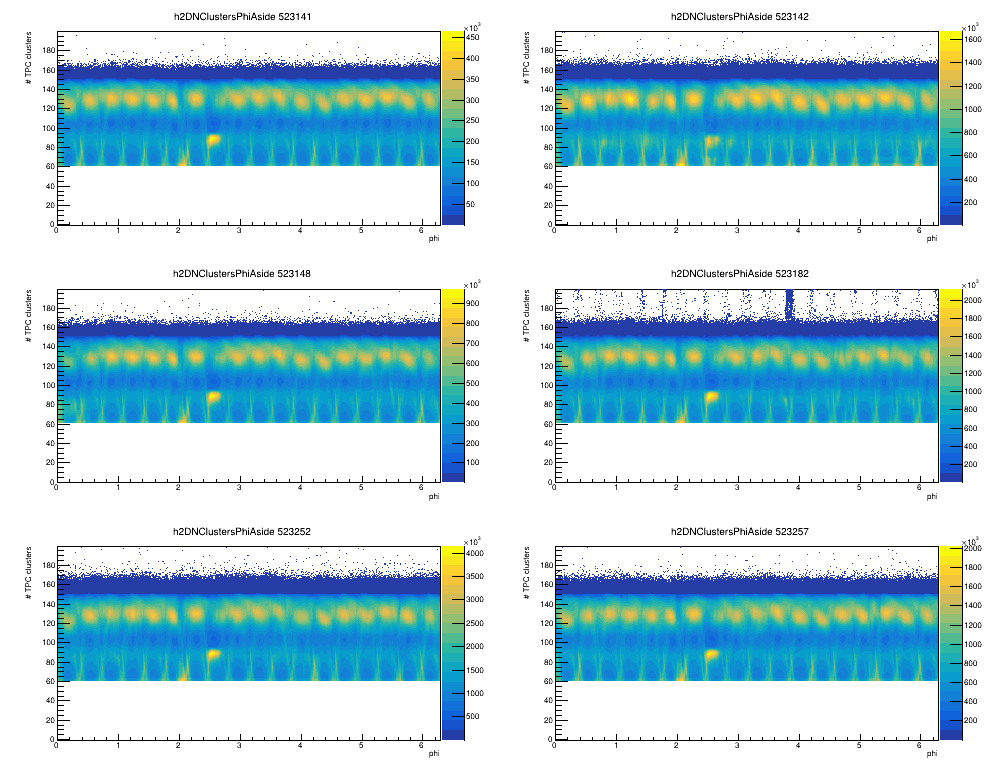

In [7]:
%jsroot off
objectName="h2DNClustersPhiAside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=False,legend=False,legendNames=runList,pads=True,drawOption="COLZ")
canvas.Draw()

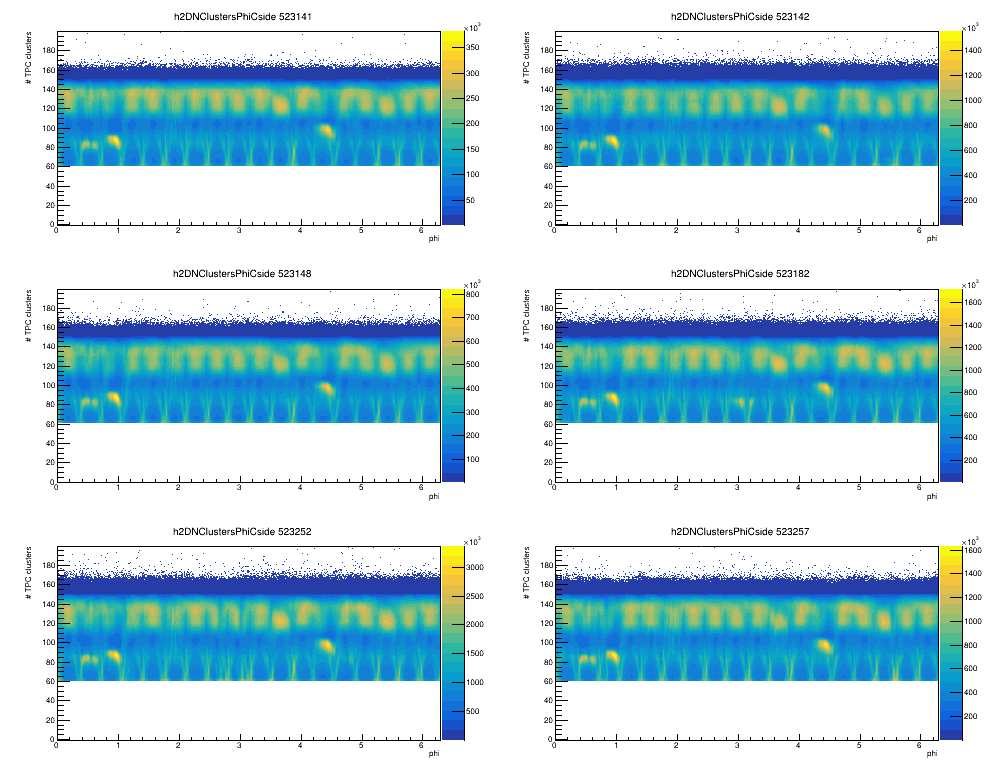

In [8]:
%jsroot off
objectName="h2DNClustersPhiCside"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=False,legend=False,legendNames=runList,pads=True,drawOption="COLZ")
canvas.Draw()

---
### Pt distribution

+ All runs similar, no differences in high-pt tails observed
+ Result: `OK`

In [9]:
%jsroot on
objectName="hPt"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,log="logxy",legendNames=runList,pads=False)
canvas.Draw()

---
### Clusters per track

+ Main peak is broader compared to previous runs
+ Secondary peak also prominent
+ Result: `OK`

In [10]:
%jsroot on
objectName="hNClustersAfterCuts"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,pads=False)
canvas.Draw()

### Number of clusters vs eta
+ cluster distrubution not flat over eta especially for negative eta (C-side)
+ Result: `BAD`

In [11]:
%jsroot on
objectName="h2DNClustersEta"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=False,legend=False,legendNames=runList,pads=True,drawOption="COLZ")
canvas.Draw()

---
### Sign of tracks

+ Ratio of pos/neg tracks consistent in all runs
  + Result: `GOOD`

In [12]:
%jsroot on
objectName="hSign"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,normalize=True,legend=True,legendNames=runList,pads=False)
canvas.Draw()

---
## PID QC

### MIP signal
+ dEdx calibration of runs `523182` & `523252` & `523257` not correct
 + MIP peak at ~57
 + Quality: `BAD`

In [13]:
%jsroot on
objectName="hdEdxTotMIP_TPC"
quality = checkHistograms(objectName,rootDataFile,check="(histogram.Fit(\"gaus\",\"Sq\",\"\",40,60)) and 45<histogram.GetFunction(\"gaus\").GetParameter(1)<55")
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,legendNames=runList,check=quality,normalize=False,log="logx",legend=False,pads=True)
canvas.Draw()

---
### dEdx vs P
+ Unexpected bands observed in Run `523182`
+ Quality: **BAD**

In [14]:
%jsroot on
objectName="hdEdxTotVsP_TPC"
[hist,legend,canvas,pad1] = drawHistograms(objectName,rootDataFile,legendNames=runList,log="logxyz",pads=True,drawOption="COLZ")
canvas.Draw()